## Overview
Kickstarter is a crowdfunding site where anyone can start campaigns to receive funding from the general public for their creative projects. The site has an interesting dynamic because the creator only receives the funding if they reach their specified funding goal in their specified amount of time. So creators have to balance between asking for enough funds while still making this goal achievable. They also have to strike a balance between giving themselves enough time to reach their funding goal while making the funding period short enough to receive those funds within a reasonable amount of time. In this data analysis, we're going to explore what subtle factors could contribute to the success of a campaign and try to extract tips that can help you fund your own projects.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ks = pd.read_csv("ks-projects-201801.csv")
ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01 03:43:57,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0


By graphing main category on a count plot with a hue of state, we can see if and how success rates differ between the different project categories.

Text(0.5,1,'Number of projects in each category (by status of project)')

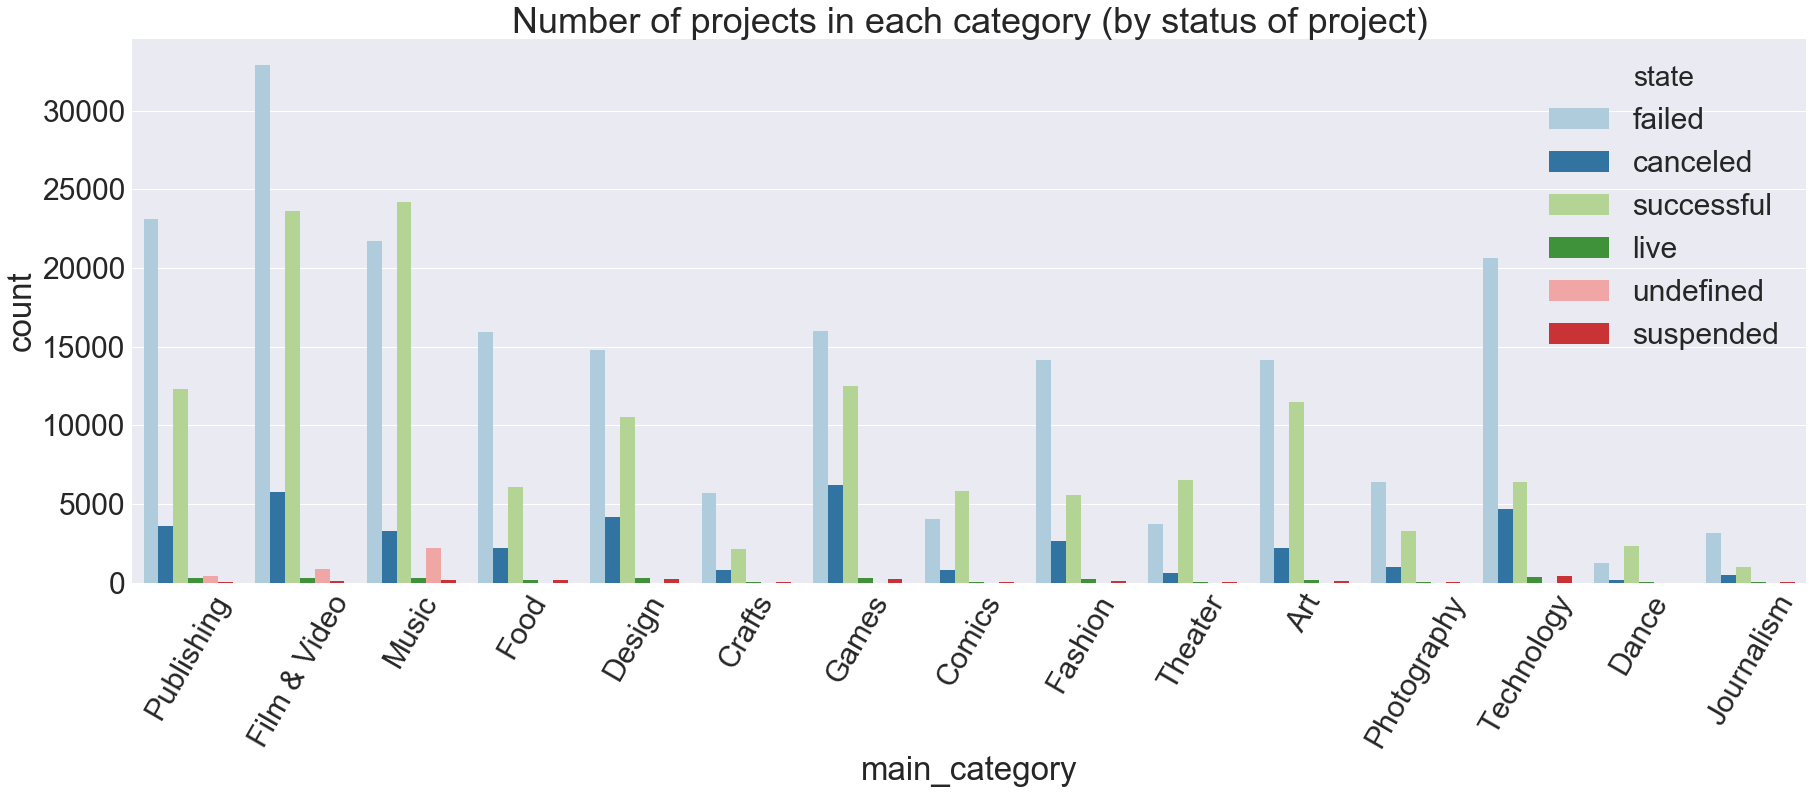

In [3]:
plt.figure(figsize=(30,10))
sns.set(font_scale=3)
sns.countplot(x='main_category', data=ks, hue="state", palette="Paired")
plt.xticks(rotation=60)
plt.title("Number of projects in each category (by status of project)")

It looks like the success rates definitely differ based on the category. For example, music projects seem to fair pretty well while technology projects fail more often. We can delve more into the reasons behind these differences. For example, do tech projects fail more because they tend to have higher funding goals, or is there something inherent that contributes to lower success rates?

First of all, we're going to drop projects from the data set that have a state of live, undefined, or suspended. These states seem too ambiguous to categorize the projects into successful or unsuccessful. For the sake of this analysis, I'm also going to consider a canceled project a failure because in the majority of cases, a canceled project means that the creator did not believe they would reach their goal.

In [4]:
ks.drop(ks[(ks.state == "live") | (ks.state == "undefined") | (ks.state == "suspended")].index, inplace=True )

In [5]:
def success(state):
    if state == "successful":
        return 1
    else:
        return 0
    
ks["successful"] = ks["state"].apply(success)

Text(0.5,1,'Number of projects in each category (by status of project)')

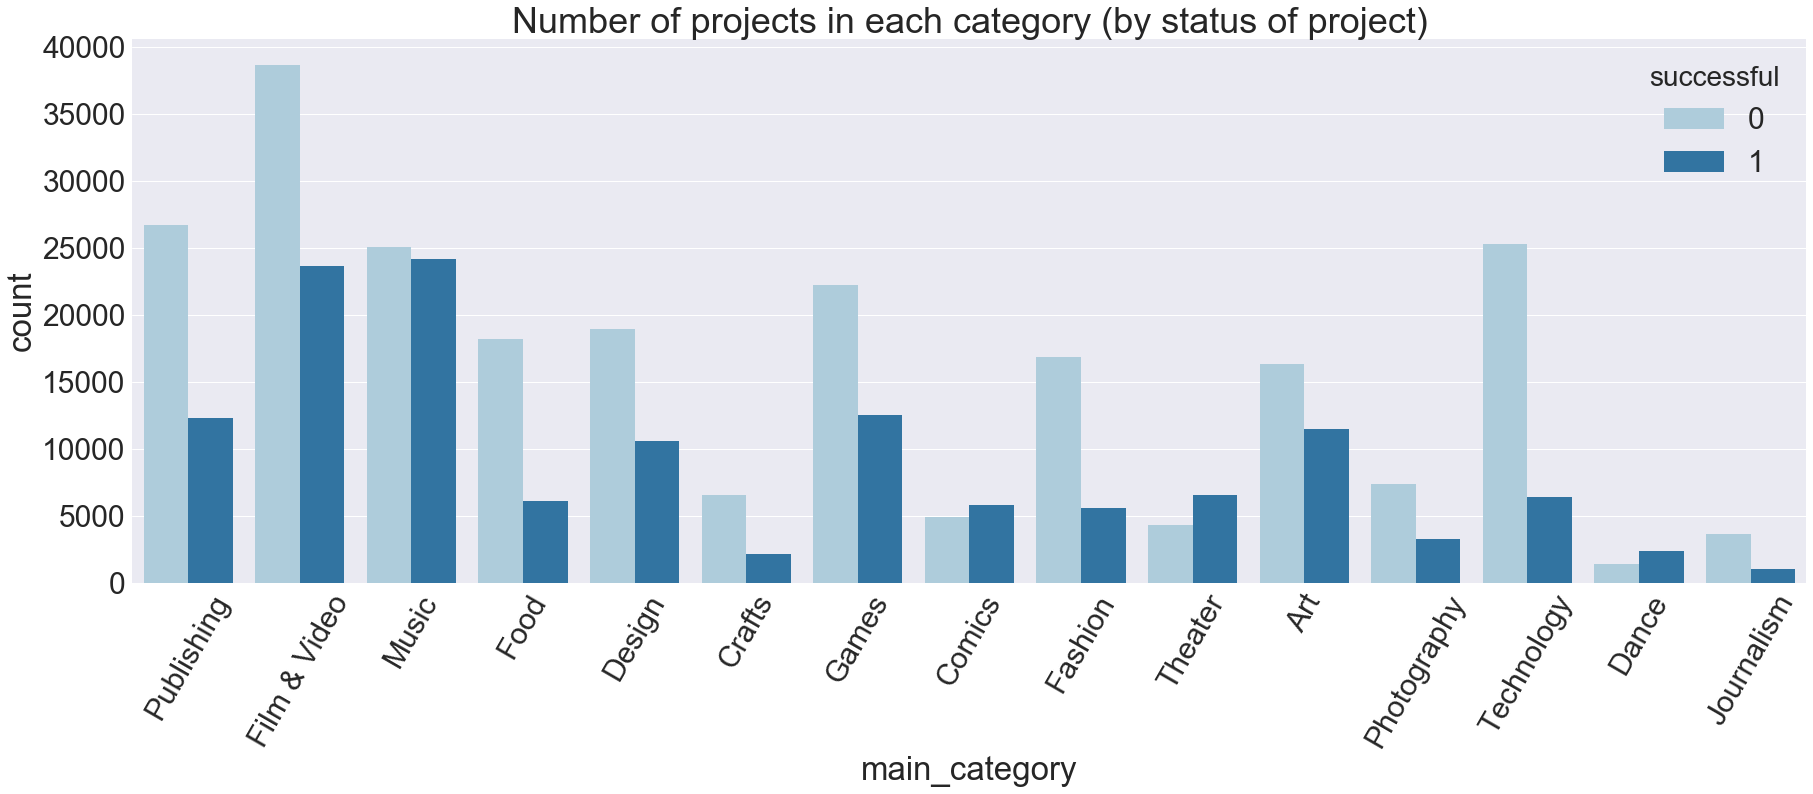

In [6]:
plt.figure(figsize=(30,10))
sns.set(font_scale=3)
sns.countplot(x='main_category', data=ks, hue="successful", palette="Paired")
plt.xticks(rotation=60)
plt.title("Number of projects in each category (by status of project)")

We're also going to create a column in the data set for the funding period (in days) because the data set currently gives the launch date and the deadline date for each campaign. Projects that have a funding period exceeding 5000 days are removed from the data set because that means a period of over 13 years. Because creators only get the funds after the deadline is reached, people who have funding periods this long, I believe are either crazy or don't know how Kickstarter works.

In [7]:
fund_time = (pd.to_datetime(ks.deadline) - pd.to_datetime(ks.launched)).apply(lambda dt : dt.days + dt.seconds / (60 * 60 * 24))
ks['fund_time'] = fund_time
ks.drop(ks[ks.fund_time > 5000].index, inplace=True)

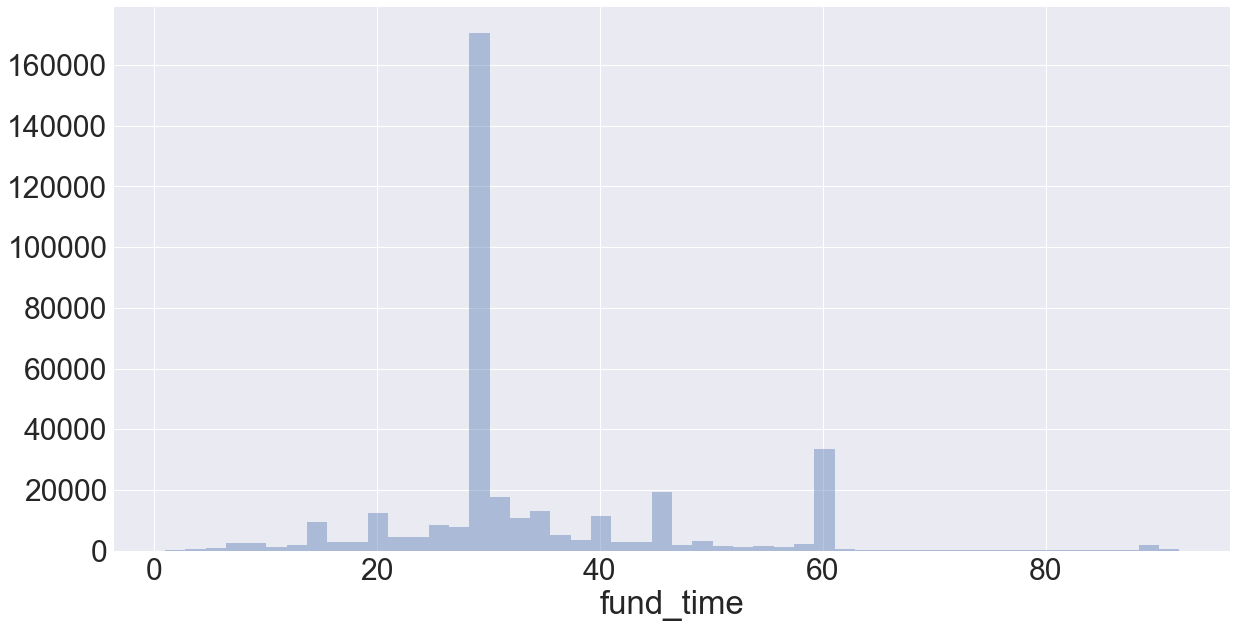

In [8]:
plt.figure(figsize=(20, 10))
sns.distplot(ks['fund_time'], kde=False)

In [9]:
ks['fund_time'].value_counts().head()

30.000000    136667
60.000000     26518
45.000000     13709
29.958333     11276
30.041667     10717
Name: fund_time, dtype: int64

We can see that the most popular funding period is a month, which makes sense because that is the default when you create a new project on Kickstarter. Based on status quo bias, it makes sense that many people would stick to that month time frame. However, because many people choose that time frame without a reason beside it being a nice, round length of time and the default, I don't believe it is a good metric in determining the success of a project.

In [10]:
ks = ks[(ks['fund_time'] > 29) & (ks['fund_time'] < 31)]
ks.describe()

,ID,goal,pledged,backers,usd pledged,successful,fund_time
count,1.751260e+05,1.751260e+05,1.751260e+05,175126.000000,1.749960e+05,175126.000000,175126.000000
mean,1.073374e+09,3.706179e+04,7.895285e+03,93.117812,5.823226e+03,0.329072,30.008616
std,6.190852e+08,8.549692e+05,6.663983e+04,869.848064,5.383868e+04,0.469877,0.167613
min,1.852000e+04,1.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,29.000081
25%,5.363806e+08,2.000000e+03,2.100000e+01,1.000000,1.000000e+01,0.000000,30.000000
50%,1.073062e+09,5.500000e+03,4.690000e+02,10.000000,2.860000e+02,0.000000,30.000000
75%,1.607902e+09,1.531650e+04,3.597000e+03,53.000000,2.636273e+03,1.000000,30.000000
max,2.147446e+09,1.000000e+08,8.782572e+06,219382.000000,8.782572e+06,1.000000,30.999954


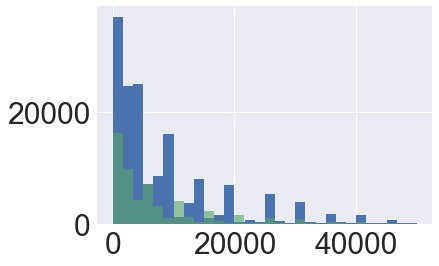

In [11]:
ks[ks.goal < 50000]['goal'].hist(bins=30)
ks[(ks.successful == 1) & (ks.goal < 50000)]['goal'].hist(bins=30, alpha=0.6)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

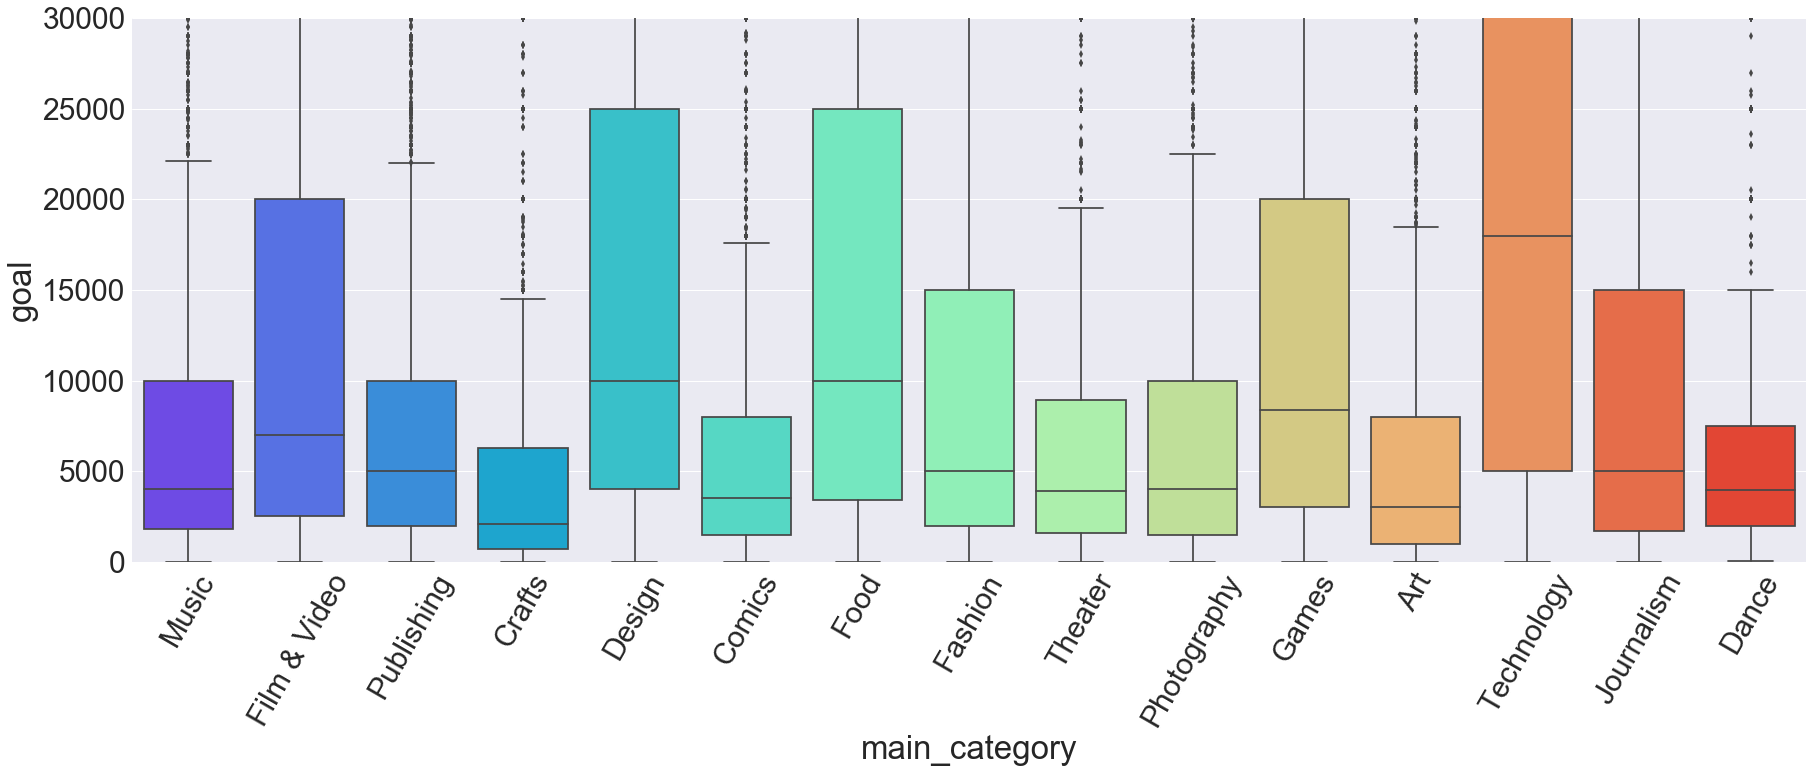

In [12]:
plt.figure(figsize=(30, 10))
sns.boxplot(x="main_category", y="goal", data=ks, palette="rainbow")
plt.ylim(0, 30000)
plt.xticks(rotation=60)

In [13]:
ks.groupby('main_category').mean()['goal'].sort_values(ascending=False)

main_category
Technology      71119.601844
Film & Video    68133.214518
Food            41855.070543
Journalism      41485.990569
Games           39283.549141
Design          31686.627973
Publishing      28689.799795
Fashion         27993.134269
Theater         27768.251225
Art             21658.177814
Music           16337.175291
Photography     12554.916818
Comics          10835.747691
Dance           10238.279586
Crafts           8781.129125
Name: goal, dtype: float64

In [14]:
ks.groupby('main_category').median()['goal'].sort_values(ascending=False)

main_category
Technology      18000.0
Food            10000.0
Design          10000.0
Games            8400.0
Film & Video     7000.0
Publishing       5000.0
Journalism       5000.0
Fashion          5000.0
Photography      4000.0
Music            4000.0
Dance            3959.0
Theater          3921.0
Comics           3500.0
Art              3000.0
Crafts           2100.0
Name: goal, dtype: float64

In [15]:
ks.groupby('main_category')['goal'].describe()

,count,mean,std,min,25%,50%,75%,max
main_category,,,,,,,,
Art,12605.0,21658.177814,5.236527e+05,1.0,1000.0,3000.0,8000.0,40000000.0
Comics,5521.0,10835.747691,1.390966e+05,1.0,1500.0,3500.0,8000.0,10000000.0
Crafts,5030.0,8781.129125,3.474123e+04,1.0,700.0,2100.0,6287.5,1000000.0
Dance,1352.0,10238.279586,4.350289e+04,40.0,2000.0,3959.0,7500.0,900000.0
Design,13245.0,31686.627973,1.513878e+05,1.0,4000.0,10000.0,25000.0,10000000.0
Fashion,11717.0,27993.134269,9.370484e+05,1.0,2000.0,5000.0,15000.0,100000000.0
Film & Video,26406.0,68133.214518,1.494618e+06,1.0,2500.0,7000.0,20000.0,100000000.0
Food,12692.0,41855.070543,9.175872e+05,1.0,3400.0,10000.0,25000.0,99000000.0
Games,17511.0,39283.549141,4.824460e+05,1.0,3000.0,8400.0,20000.0,50000000.0


In [16]:
ks1 = ks.drop(ks[ks.goal > 500000].index)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

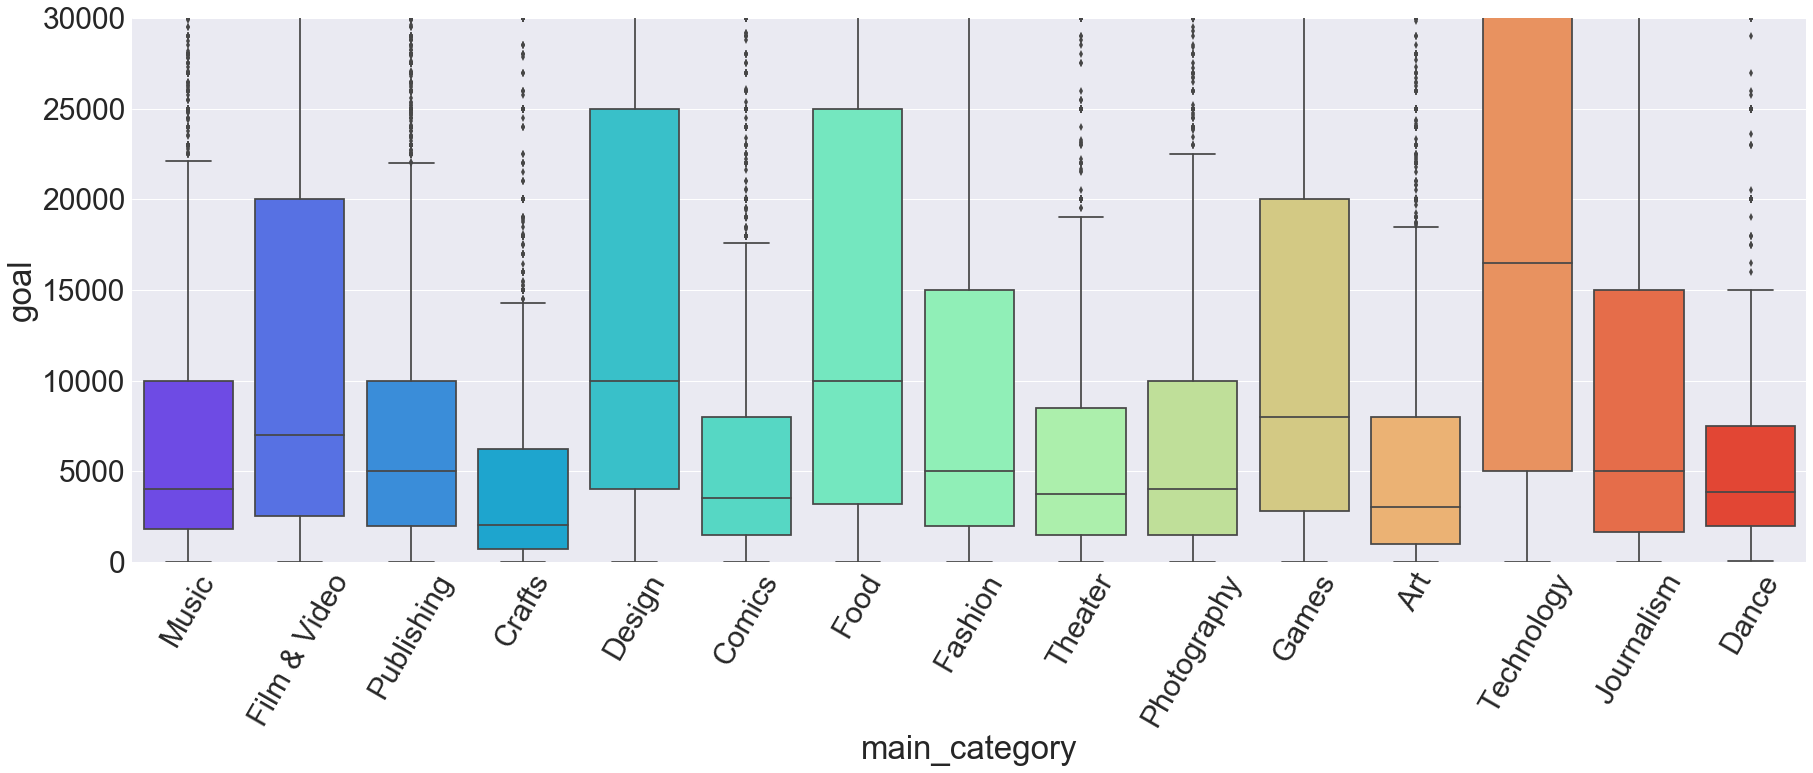

In [17]:
plt.figure(figsize=(30, 10))
sns.boxplot(x="main_category", y="goal", data=ks1, palette="rainbow")
plt.ylim(0, 30000)
plt.xticks(rotation=60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

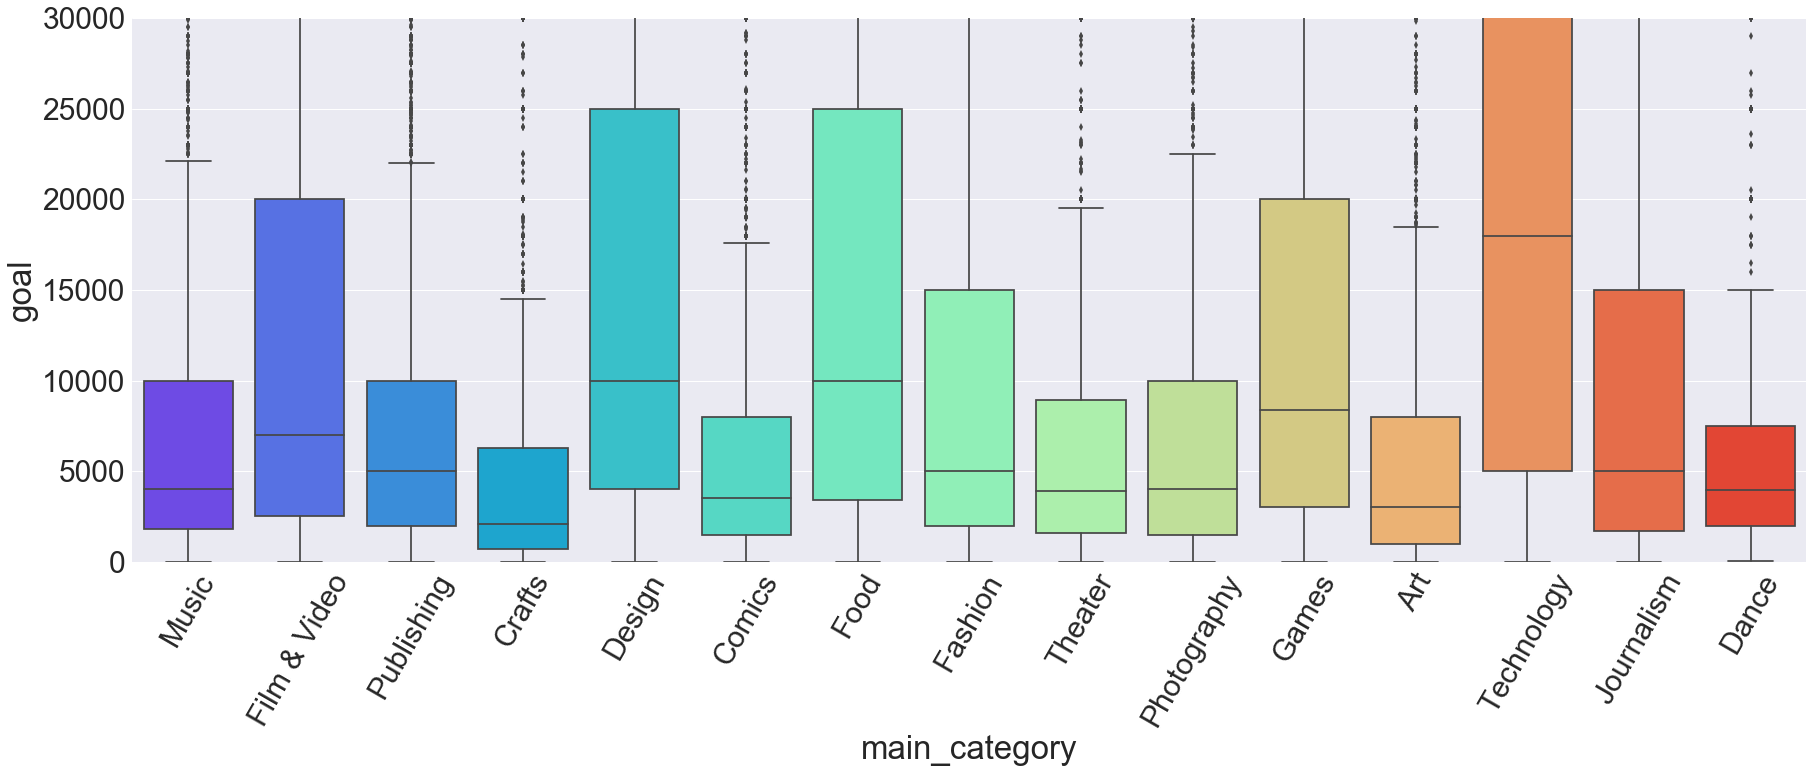

In [18]:
plt.figure(figsize=(30, 10))
sns.boxplot(x="main_category", y="goal", data=ks, palette="rainbow")
plt.ylim(0, 30000)
plt.xticks(rotation=60)

In [19]:
ks.groupby('main_category').mean()['goal'].sort_values(ascending=False)

main_category
Technology      71119.601844
Film & Video    68133.214518
Food            41855.070543
Journalism      41485.990569
Games           39283.549141
Design          31686.627973
Publishing      28689.799795
Fashion         27993.134269
Theater         27768.251225
Art             21658.177814
Music           16337.175291
Photography     12554.916818
Comics          10835.747691
Dance           10238.279586
Crafts           8781.129125
Name: goal, dtype: float64

In [20]:
ks1.groupby('main_category').mean()['goal'].sort_values(ascending=False)

main_category
Technology      40814.198977
Design          25123.144423
Food            24901.974761
Games           23411.369106
Film & Video    21987.190463
Journalism      16448.251166
Fashion         14549.928829
Publishing      10812.598646
Theater         10637.269188
Photography     10359.060442
Art             10066.678341
Music            9469.605842
Dance            8407.823573
Crafts           8215.452457
Comics           8073.841676
Name: goal, dtype: float64

In [21]:
ks['title_length'] = ks['name'].apply(lambda x : len(x))

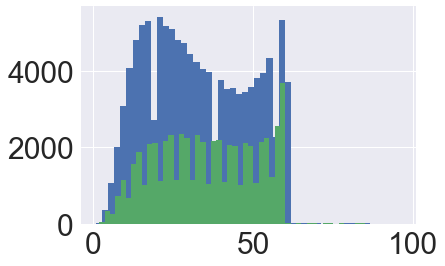

In [22]:
ks[ks.successful == 0]['title_length'].hist(bins=50)
ks[ks.successful == 1]['title_length'].hist(bins=50)

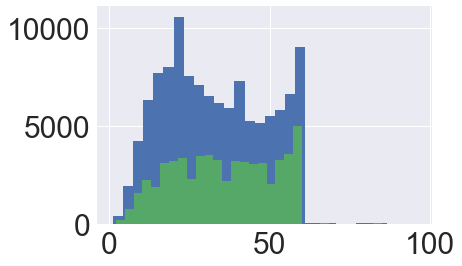

In [23]:
ks[ks.successful == 0]['title_length'].hist(bins=30)
ks[ks.successful == 1]['title_length'].hist(bins=30)

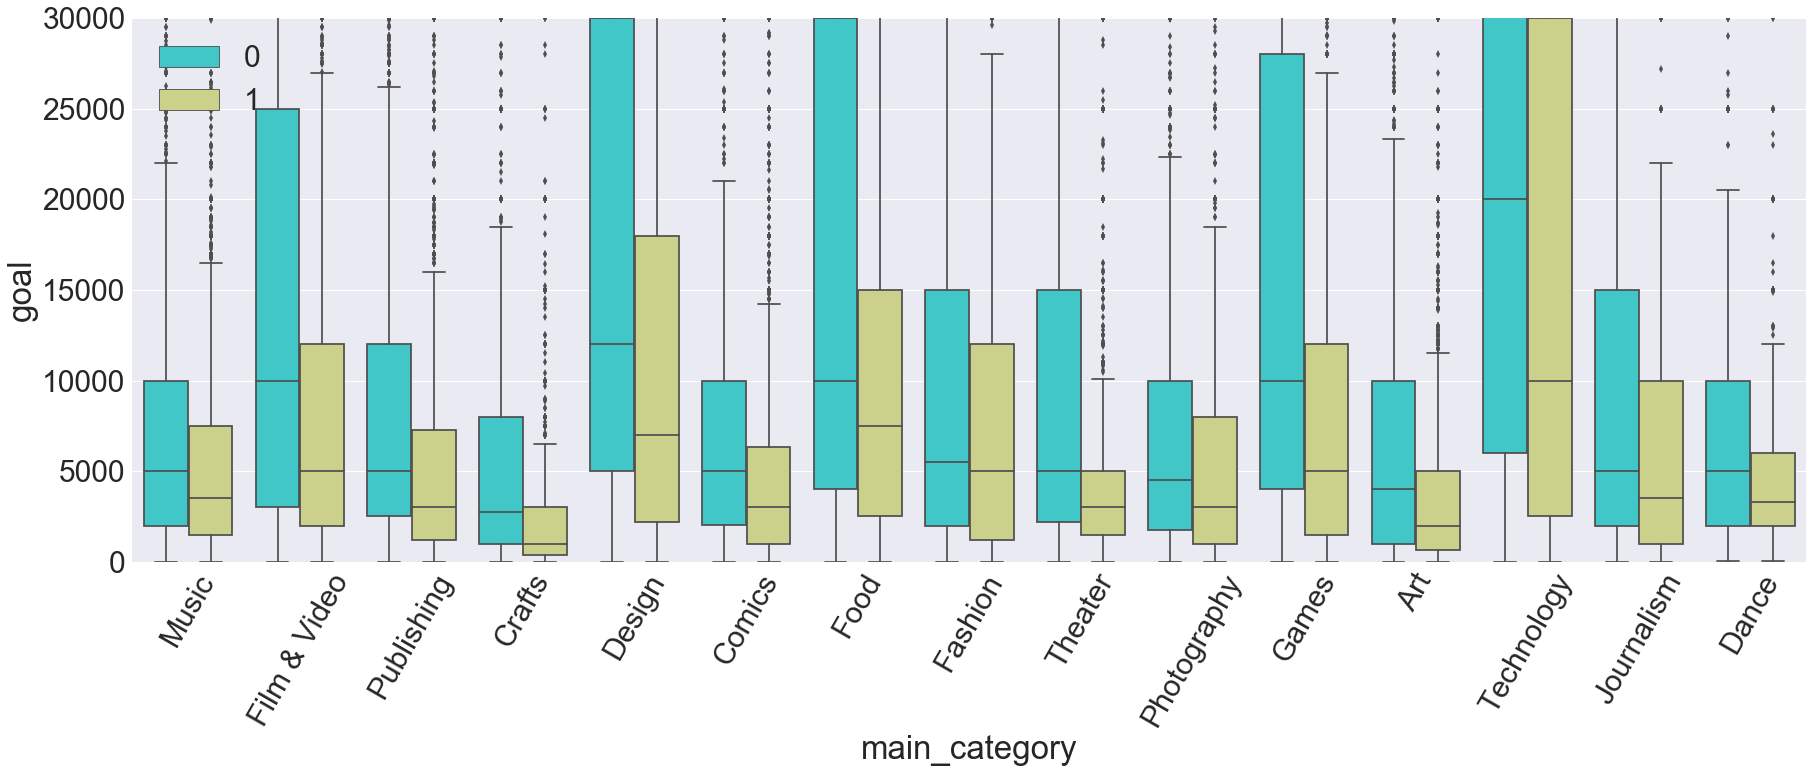

In [24]:
plt.figure(figsize=(30, 10))
sns.boxplot(x="main_category", y="goal", data=ks, palette="rainbow", hue="successful")
plt.ylim(0, 30000)
plt.xticks(rotation=60)
plt.legend(loc=2)

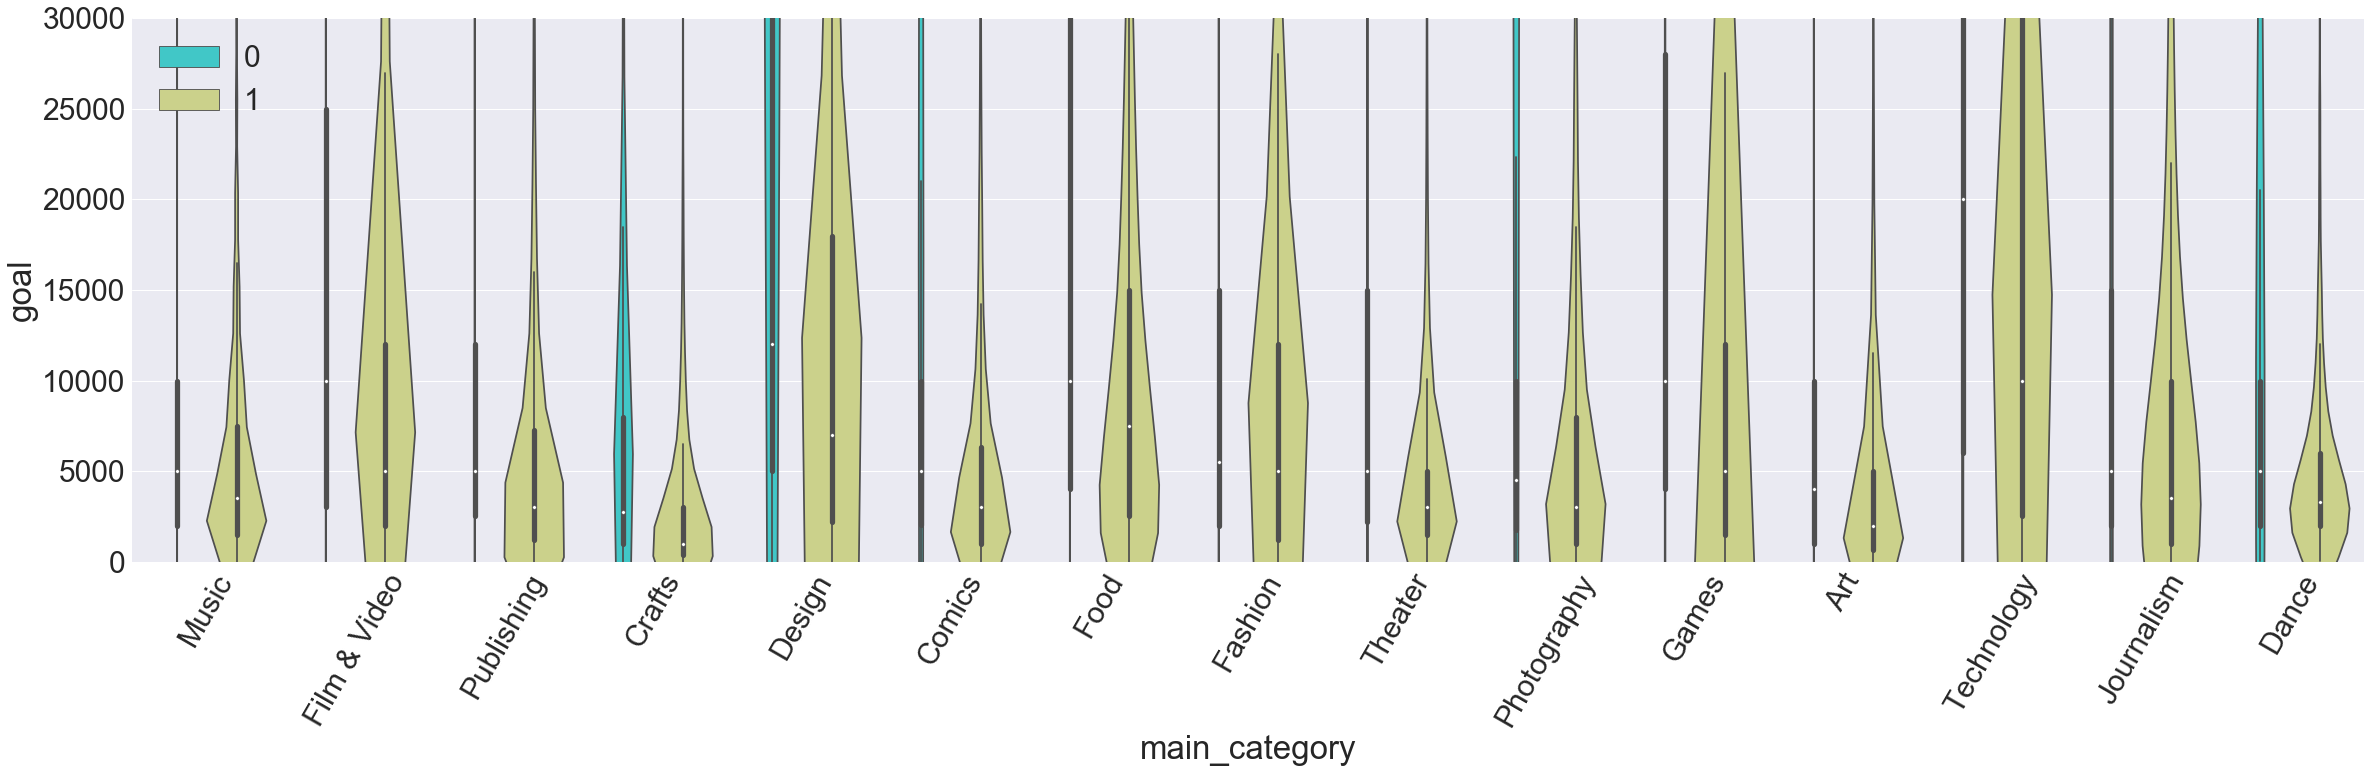

In [40]:
plt.figure(figsize=(40, 10))
sns.violinplot(x="main_category", y="goal", data=ks, palette="rainbow", hue="successful")
plt.ylim(0, 30000)
plt.xticks(rotation=60)
plt.legend(loc=2)

In [25]:
ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,successful,fund_time,title_length
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,0,30.041667,49
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10 21:55:48,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,0,30.000000,57
10,100004721,Of Jesus and Madmen,Nonfiction,Publishing,CAD,2013-10-09 18:19:37,2500.0,2013-09-09 18:19:37,0.00,failed,0,CA,0.00,0,30.000000,19
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08 06:42:58,12500.0,2013-03-09 06:42:58,12700.00,successful,100,US,12700.00,1,30.000000,16
12,1000055792,The Cottage Market,Crafts,Crafts,USD,2014-10-02 17:11:50,5000.0,2014-09-02 17:11:50,0.00,failed,0,US,0.00,0,30.000000,18


In [26]:
starting_month = (pd.to_datetime(ks.launched)).apply(lambda dt : dt.month)
ks['starting_month'] = starting_month

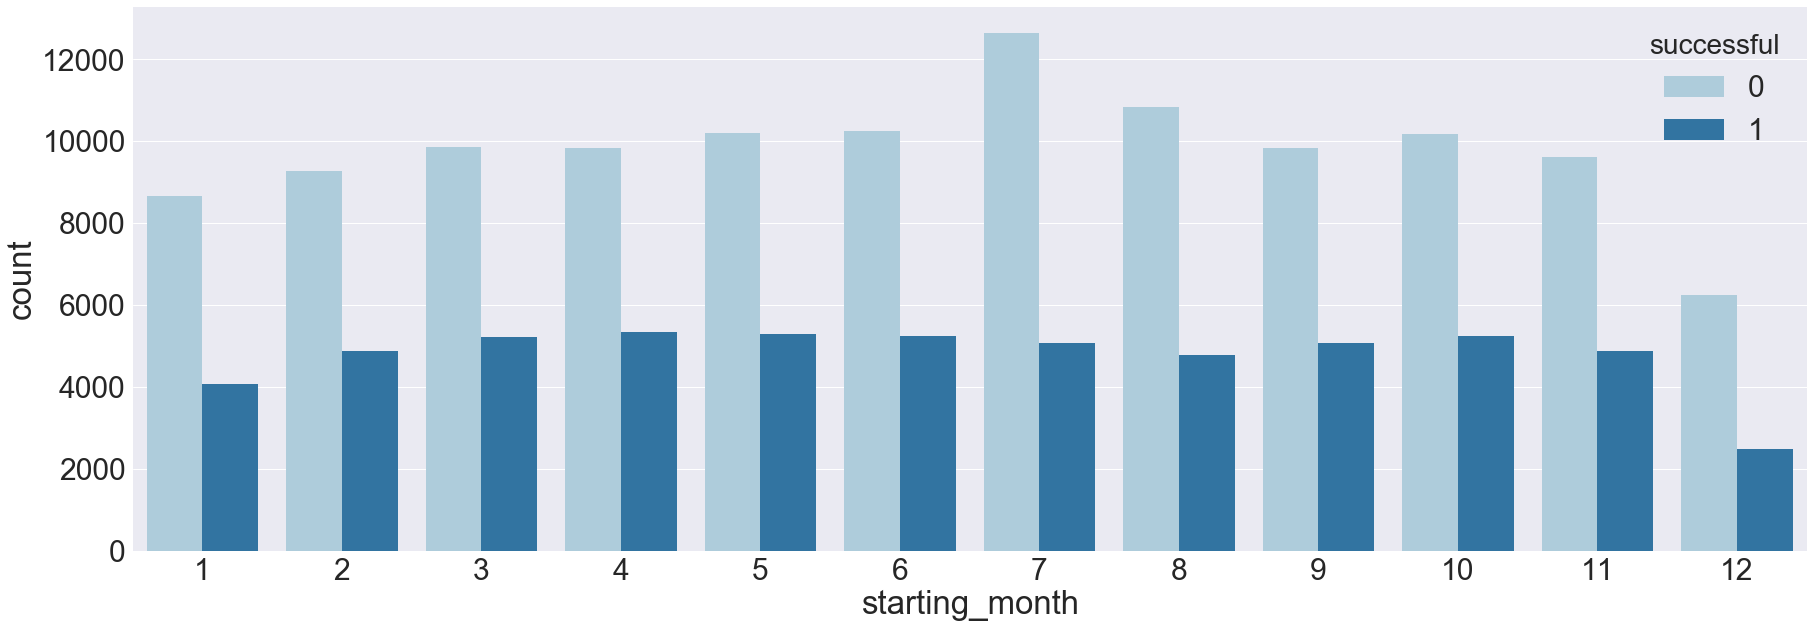

In [27]:
plt.figure(figsize=(30, 10))
sns.countplot(x='starting_month', data=ks, hue="successful", palette="Paired")

In [28]:
ending_month = (pd.to_datetime(ks.deadline)).apply(lambda dt : dt.month)
ks['ending_month'] = starting_month

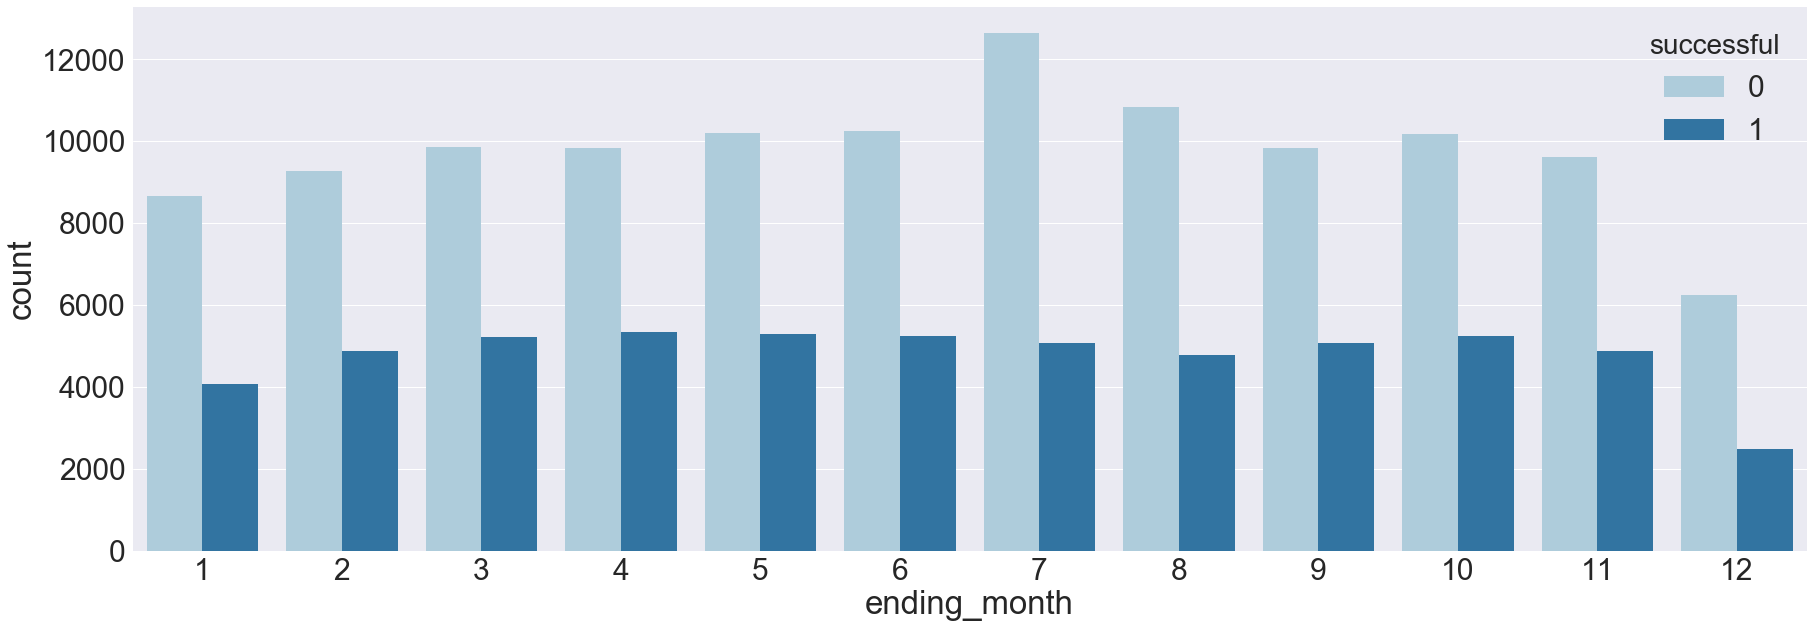

In [29]:
plt.figure(figsize=(30, 10))
sns.countplot(x='ending_month', data=ks, hue="successful", palette="Paired")

In [30]:
ks['freq_funding'] = ks.groupby('goal')['goal'].transform('count')

In [31]:
ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,successful,fund_time,title_length,starting_month,ending_month,freq_funding
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,0,30.041667,49,3,3,14712.0
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10 21:55:48,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,0,30.000000,57,7,7,396.0
10,100004721,Of Jesus and Madmen,Nonfiction,Publishing,CAD,2013-10-09 18:19:37,2500.0,2013-09-09 18:19:37,0.00,failed,0,CA,0.00,0,30.000000,19,9,9,5460.0
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08 06:42:58,12500.0,2013-03-09 06:42:58,12700.00,successful,100,US,12700.00,1,30.000000,16,3,3,624.0
12,1000055792,The Cottage Market,Crafts,Crafts,USD,2014-10-02 17:11:50,5000.0,2014-09-02 17:11:50,0.00,failed,0,US,0.00,0,30.000000,18,9,9,14712.0


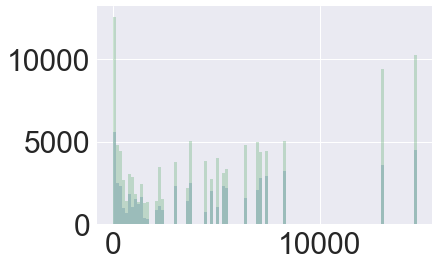

In [32]:
ks[ks.successful == 1]['freq_funding'].hist(bins=100, alpha=0.3)
ks[ks.successful == 0]['freq_funding'].hist(bins=100, alpha=0.3)

In [35]:
ks['currency'].nunique()

14

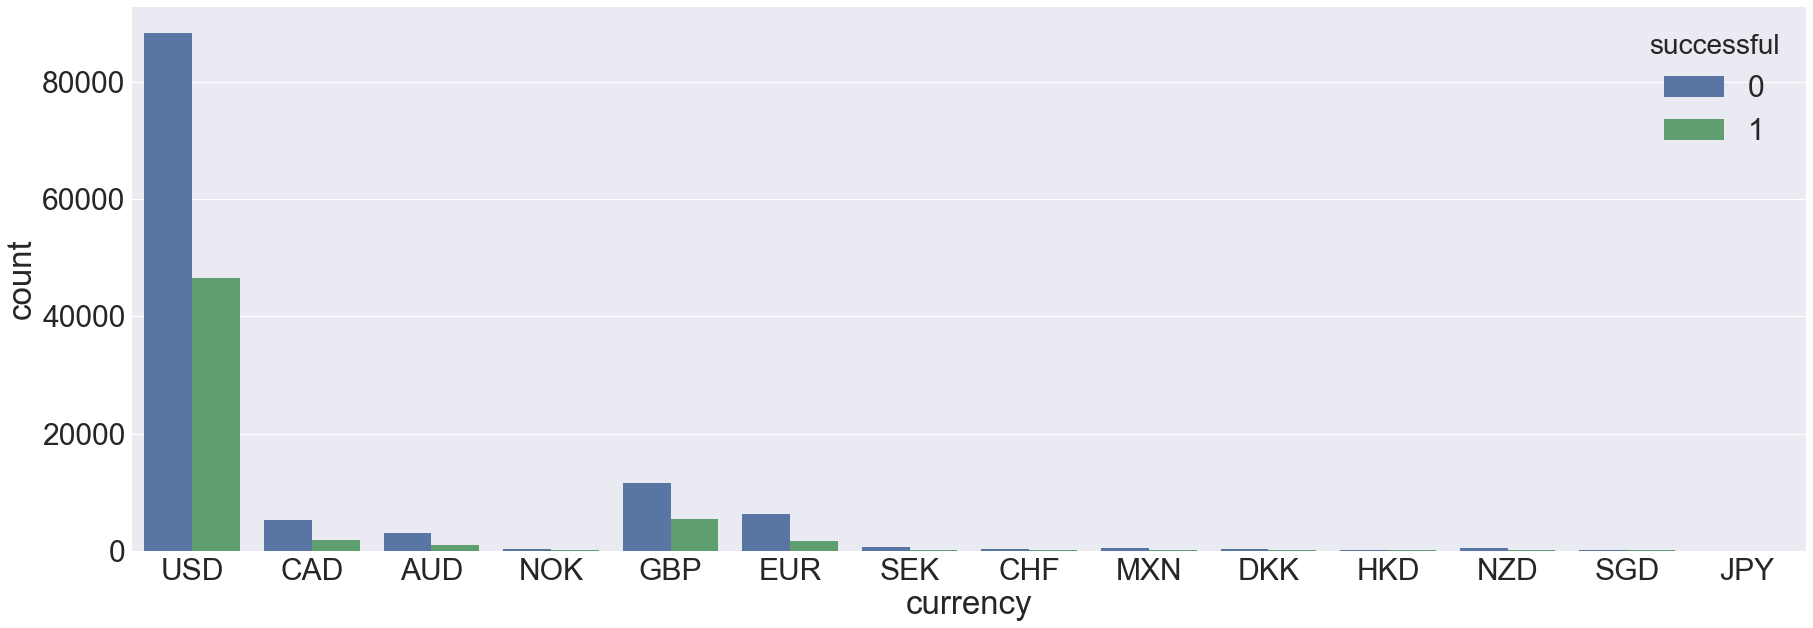

In [37]:
plt.figure(figsize=(30, 10))
sns.countplot(x="currency", data=ks, hue="successful")